In [ ]:
# hardcoding N as 16

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import Crypto.Random.random as rand
import gmpy2

In [3]:
def bitnum(row, col):
    return row*N + col

def get_masks(pos):
    cell_mask = 2**pos # set one random bit to 1
    row = pos // N
    col = pos % N
    col_left = (col - 1) % N
    col_right = (col + 1) % N
    row_up = (row - 1) % N
    row_down = (row + 1) % N
    adj_mask = 0
    adj_mask += 2**bitnum(row, col_left)
    adj_mask += 2**bitnum(row, col_right)
    adj_mask += 2**bitnum(row_up, col)
    adj_mask += 2**bitnum(row_down, col)
    return cell_mask, adj_mask

def print_state(state):
    for row in range(N):
        for col in range(N):
            print(state%2, end='')
            state //= 2
        print()

def show_state(state):
    np_state = np.zeros((N,N))
    for row in range(N):
        for col in range(N):
            np_state[row,col] = (state%2)*2 - 1
            state //= 2
    fig, ax = plt.subplots()
    ax.imshow(np_state)
    ax.axis('off')

#pos = 34
#cell, adj = get_masks(pos)
#print_state(cell)
#print('--------------------------')
#print_state(adj)
#for pos in range(256):
#    pos_row = pos // 16
#    pos_col = pos % 16
#    print(f'{pos}:\t({pos_row},{pos_col})')

In [42]:
ex = np.array([2, 3]).astype(long)
cc, aa = get_masks(ex)
for c in cc:
    print_state(c)
    print('---')
for c in aa:
    print_state(c)
    print('---')

NameError: name 'long' is not defined

In [4]:
def fast_mc_step(state, beta):
    pos = np.random.randint(0,N*N-1)
    cell, adj = get_masks(pos)

    #print('--------------------------')
    #print_state(cell)
    #print('--------------------------')
    #print_state(adj)
    #print('--------------------------')

    # s =  config[a, b]
    s = int(state & cell != 0) # now it's 0 or 1
    s = s*2 - 1 # now it's -1 or 1
    # nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N] 
    nb = gmpy2.popcount(state & adj) # now it's 0 to 4
    nb = nb*2 - 4 # now it's -4, -2, 0, 2 or 4
    #print(s, nb)
    cost = 2*s*nb
    if np.random.rand() < np.exp(-cost*beta): # case of cost < 0 satisfies
        # s *= -1
        state ^= cell
    return state

In [37]:
def v_fast_mc_step(states, betas, nt):
    poss = np.random.random_integers(0, N*N-1, size=nt)
    print('poss', poss)
    cells, adjs = get_masks(poss)
    print('cells')
    for cell in cells:
        print(cell)
    print('adjs')
    for adj in adjs:
        print(adj)

    
    #print('--------------------------')
    #print_state(cell)
    #print('--------------------------')
    #print_state(adj)
    #print('--------------------------')

    # s =  config[a, b]
    s = (states & cells != 0).astype(int) # now it's 0 or 1
    s = s*2 - 1 # now it's -1 or 1
    print('s',s)
    # nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
    nb = np.asarray([gmpy2.popcount(states[i] & adjs[i]) for i in range(nt)])
#    nb = bin(states & adjs).count("1") # now it's 0 to 4
    nb = nb*2 - 4 # now it's -4, -2, 0, 2 or 4
    print('nb',nb)
    #print(s, nb)
    cost = 2*s*nb
    states_new = states ^ (np.random.rand(nt) < np.exp(-cost*beta)).astype(int) * cells
    for st in (states_new ^ states):
        print_state(st)
    return states_new

In [6]:
# global parameters

eq_steps = 1024
N = 16

# Play with single temperature point

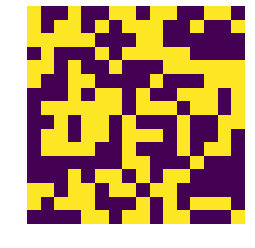

In [24]:
t = 1.7
beta = 1.0 / t
state = rand.getrandbits(N*N) # N*N bits represent random state for NxN lattice
show_state(state)

Wall time: 5.1 s


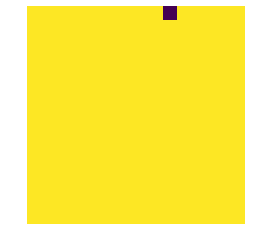

In [25]:
%%time
for i in range(eq_steps*N*N):         # equilibrate
    state = fast_mc_step(state, beta)

show_state(state)

# Now let's use some numpy vectorize magic

In [46]:
nt = 2
temps = np.linspace(1.53, 3.28, nt)
betas = 1.0 / temps
states = np.asarray([rand.getrandbits(N*N) for i in range(nt)])
#show_state(states[100])
phases = (temps > 2.269185314)
states.dtype

dtype('O')

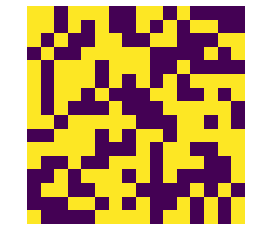

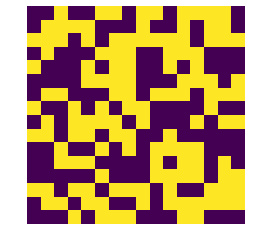

In [21]:
for state in states:
    show_state(state)

In [38]:
%%time
#for i in range(eq_steps*N*N):         # equilibrate
states = v_fast_mc_step(states, betas, nt)

poss [146 153]
cells
0
0
adjs
0
0
s [-1 -1]
nb [-4 -4]
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
0000000000000000
Wall time: 26.9 ms


C:\Users\ikhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 255 + 1) instead
  


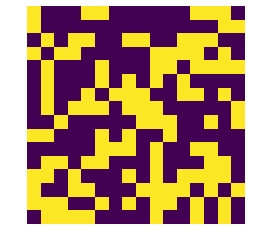

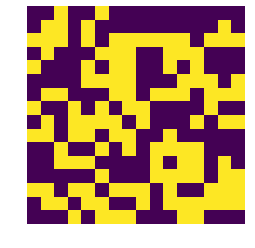

In [23]:
for state in states:
    show_state(state)